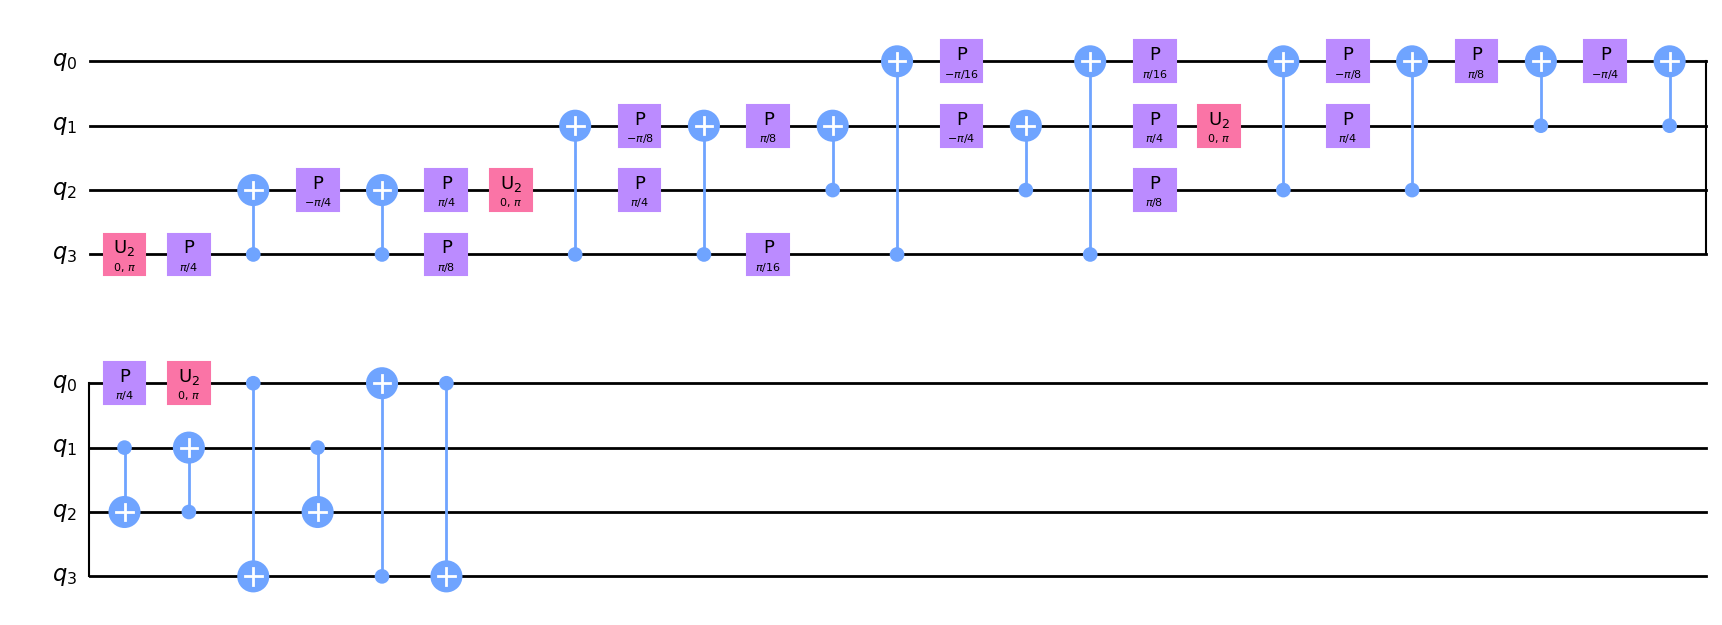

In [1]:
# use for making some figures of QFT circuit dag for the paper

from qiskit.circuit.library import QFT, TwoLocal

qc = QFT(4).decompose()
# qc = TwoLocal(4, ['ry'], 'cx', reps=1, entanglement='full', insert_barriers=False)
qc.decompose().draw(output="mpl")  # , filename="twolocal_base.svg")

In [2]:
# line coupling_map
from qiskit.transpiler import CouplingMap

line = CouplingMap.from_line(4)
grid = CouplingMap.from_grid(2, 2)
topo = grid

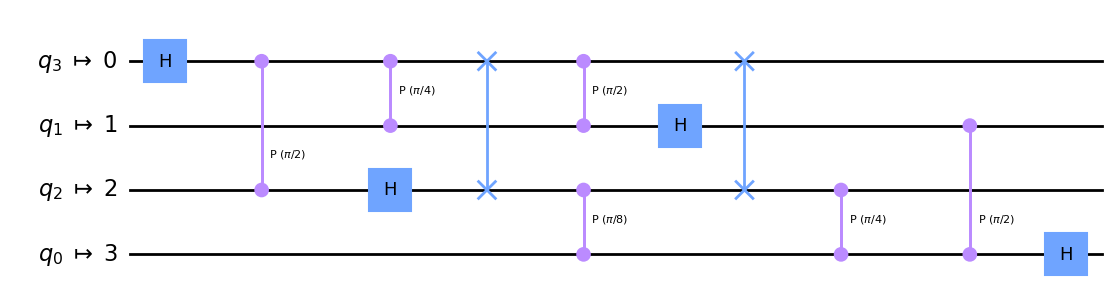

In [3]:
from qiskit import transpile

transp1 = transpile(
    qc, coupling_map=topo, optimization_level=3  # , initial_layout=[0, 1, 2, 3]
)
transp1.draw(output="mpl")  # , filename="twolocal_qiskit.svg")

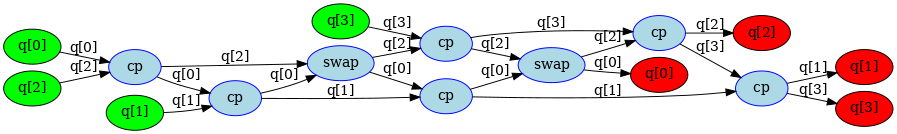

In [4]:
from qiskit.converters import circuit_to_dag

dag = circuit_to_dag(transp1)
# dag only keep 2Q nodes
for node in dag.topological_op_nodes():
    if node.op.num_qubits < 2:
        dag.remove_op_node(node)
dag.draw()

12


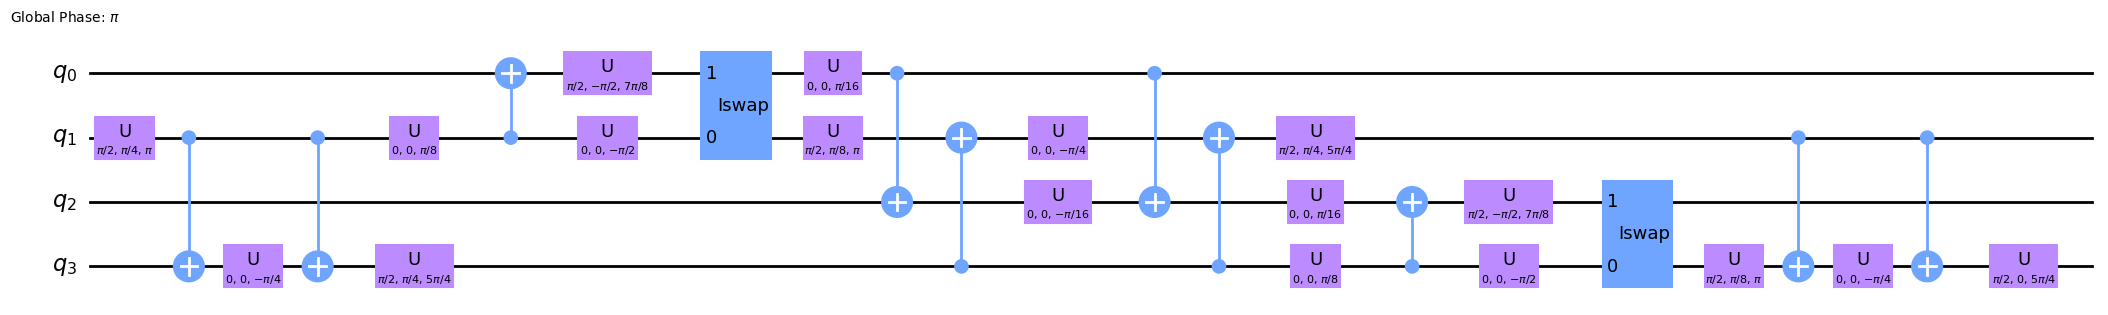

In [5]:
from virtual_swap.pass_managers import SabreVS, SabreQiskit

from virtual_swap.pass_managers import SabreVS, SabreQiskit
from transpile_benchy.metrics import DepthMetric

for _ in range(1):
    runner = SabreVS(topo)  # , cx_basis=True)
    transp = runner.run(qc)
    # mid0 = runner.pm.property_set["mid0"]
    mid = runner.pm.property_set["circuit_progress"]
    print(DepthMetric.calculate(transp))
    # if DepthMetric.calculate(transp) <= 22:
    #     break
mid.draw(output="mpl", fold=-1)  # , filename="twolocal_cns.svg")
# transp.draw(output="mpl")

16
16
12
16
14


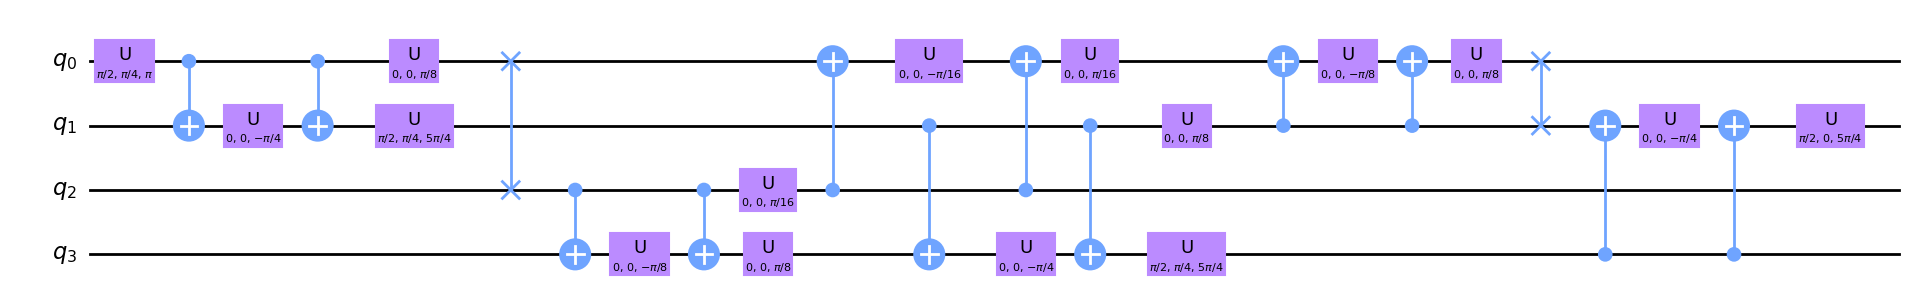

In [15]:
# set original qc to use
from qiskit import transpile

# qc2 = transpile(qc, initial_layout=runner.pm.property_set["layout"], coupling_map=coupling_map)
# qc2 = transpile(qc, coupling_map=coupling_map, optimization_level=3)
for _ in range(5):
    pm2 = SabreQiskit(topo)  # , cx_basis=True)
    qc2 = pm2.run(qc)
    mid = pm2.pm.property_set["circuit_progress"]
    print(DepthMetric.calculate(qc2))
mid.draw(output="mpl", fold=-1)

In [7]:
from qiskit.converters import circuit_to_dag

# remove 1Q nodes
dag = circuit_to_dag(mid_qc)
for node in dag.topological_op_nodes():
    if node.op.num_qubits < 2:
        dag.remove_op_node(node)
dag.draw()

NameError: name 'mid_qc' is not defined

In [ ]:
pm.pm.property_set["layout"]

Layout({
2: Qubit(QuantumRegister(4, 'q'), 0),
1: Qubit(QuantumRegister(4, 'q'), 1),
3: Qubit(QuantumRegister(4, 'q'), 2),
0: Qubit(QuantumRegister(4, 'q'), 3)
})